# Reading in Data

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
data = pd.read_csv('data/csv/data_city_seattle.csv')
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

# Testing single property type

<Axes: xlabel='PropertyGFATotal', ylabel='Electricity(kWh)'>

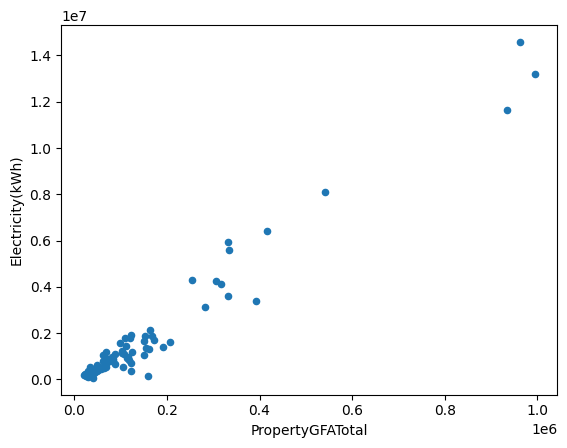

In [121]:
df = data[['PrimaryPropertyType','PropertyGFATotal','Electricity(kWh)']]
df_hotels = df[df.PrimaryPropertyType == 'Hotel']

df_hotels.plot(kind='scatter',x='PropertyGFATotal',y='Electricity(kWh)')

<Axes: xlabel='PropertyGFATotal', ylabel='Electricity(kWh)'>

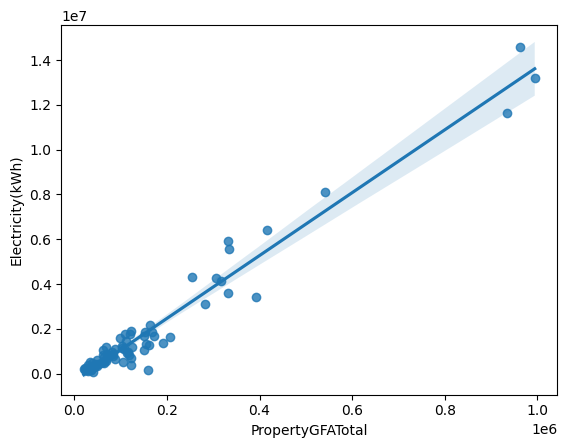

In [122]:
sns.regplot(data=df_hotels, x='PropertyGFATotal',y='Electricity(kWh)')

# Testing Multiple Asset types

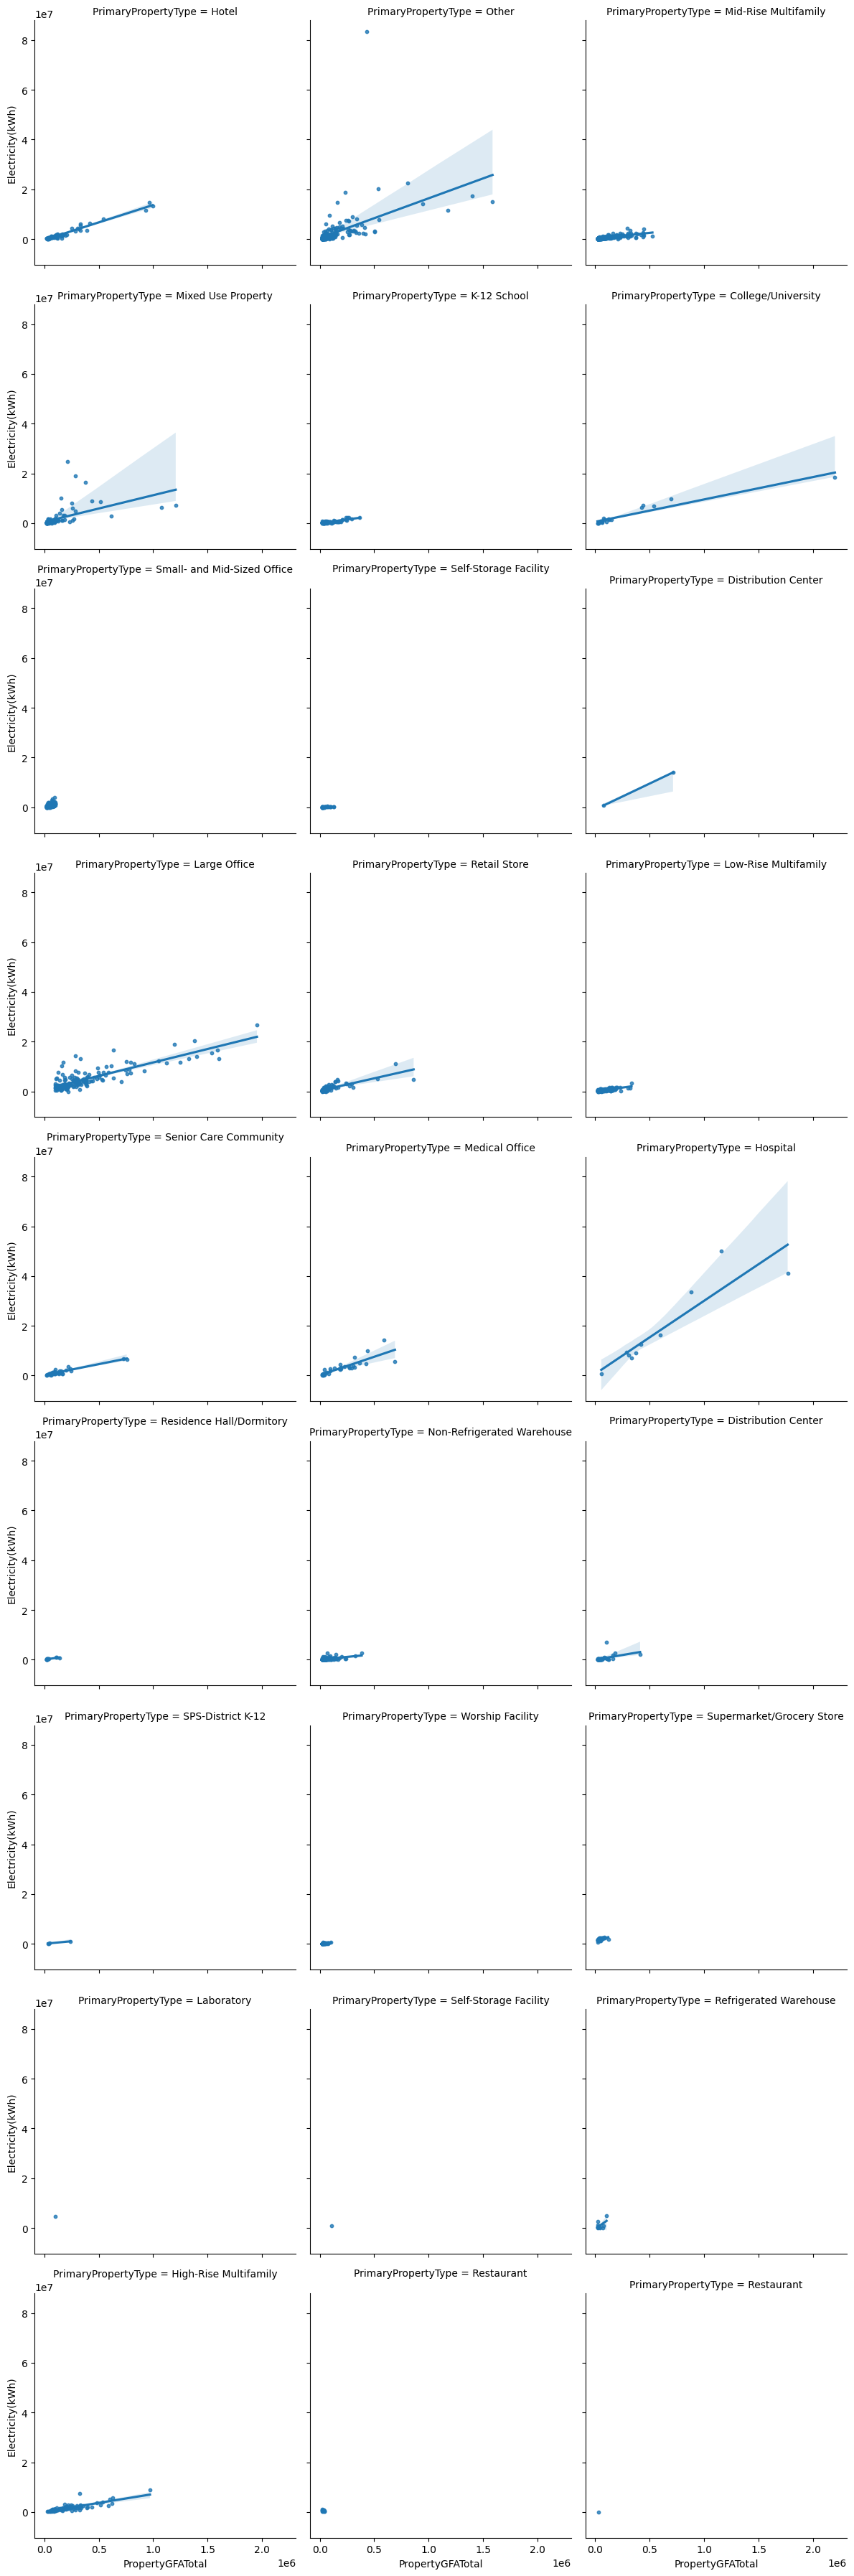

In [125]:
# Regressing GFA to Electricty consumption by property type
g = sns.FacetGrid(data=data,col='PrimaryPropertyType',col_wrap=3, height=4)
g.map(sns.regplot, 'PropertyGFATotal', 'Electricity(kWh)', scatter_kws={'s': 10})

In [128]:
data.PrimaryPropertyType.unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'College/University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility\n', 'Distribution Center', 'Large Office',
       'Retail Store', 'Low-Rise Multifamily', 'Senior Care Community',
       'Medical Office', 'Hospital', 'Residence Hall/Dormitory',
       'Non-Refrigerated Warehouse', 'Distribution Center\n',
       'SPS-District K-12', 'Worship Facility',
       'Supermarket/Grocery Store', 'Laboratory', 'Self-Storage Facility',
       'Refrigerated Warehouse', 'High-Rise Multifamily', 'Restaurant\n',
       'Restaurant'], dtype=object)

In [130]:
# Identified the following assets have high correlation

# Hospitality
df_hotels = df[df.PrimaryPropertyType == 'Hotel']

# Residential
df_lowrise_resi = df[df.PrimaryPropertyType == 'Low-Rise Multifamily']
df_midrise_resi = df[df.PrimaryPropertyType == 'Mid-Rise Multifamily']
df_highrise_resi = df[df.PrimaryPropertyType == 'High-Rise Multifamily']

# Education
df_school = df[df.PrimaryPropertyType == 'K-12 School']
df_university = df[df.PrimaryPropertyType == 'College/University']

# Office 
df_large_office = df[df.PrimaryPropertyType == 'Large Office']

# Retail (only showing some correlation)
df_retail = df[df.PrimaryPropertyType == 'Retail Store']

<Axes: xlabel='PropertyGFATotal', ylabel='Electricity(kWh)'>

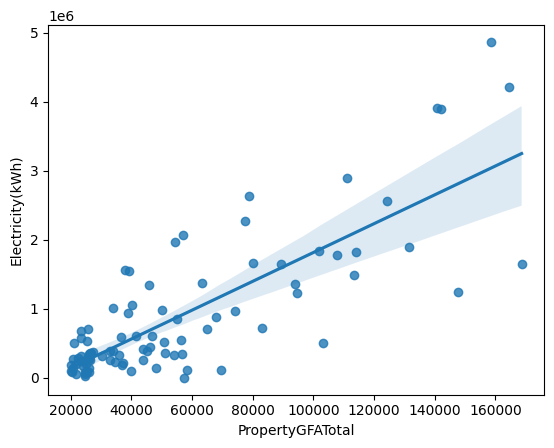

In [137]:
# remove outliers
df_retail = df_retail[df_retail.PropertyGFATotal < 200000]

# Plot regression
sns.regplot(data=df_retail,x='PropertyGFATotal',y='Electricity(kWh)')